# Project Business Statistics: E-news Express

## Problem Statement and Objectives

**Background:** 

An online news portal aims to expand its business by acquiring new subscribers. The design team of the company has created a new landing page. It is necessary to decide whether the new landing page is more effective to gather new subscribers. 


**Objective:**
* Explore the dataset and extract insights using Exploratory Data Analysis.
* Do the users spend more time on the new landing page than the old landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
* Does the converted status depend on the preferred language? 
* Is the mean time spent on the new page same for the different language users?
* Significance level of 0.05 for all tests.

**Data Dictionary:**

The dataset consists in a randomly selected 100 users divided equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'.

* user_id - This represents the user ID of the person visiting the website.
* group - This represents whether the user belongs to the first group (control) or the second group (treatment).
* landing_page - This represents whether the landing page is new or old.
* time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
* converted - This represents whether the user gets converted to a subscriber of the news portal or not.
* language_preferred - This represents the language chosen by the user to view the landing page.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') 

## 1. Explore the dataset and extract insights using Exploratory Data Analysis.

### Exploratory Data Analysis 

1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
df= pd.read_csv('abtest.csv')

### Data Overview

In [3]:
df.head() #Check out the first 5 values of the dataset.

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


**Observations:** 
* Data in each row corresponds to a user visiting the website. 
* The columns 'group' and 'landind_page' feature the same information, wheter the user belongs to the control group and therefore the landing page is the old one, or the user belongs to the treatment group and the landing page corresponds to the new one. We can double-check if this assumpt is correct. If it is, we can use both columns indistinctly when performing our analysis. 

In [4]:
pd.crosstab(index = df.landing_page, columns = df.group) 
#Crosstab landing_page and group to double-check if they have matching values.

group,control,treatment
landing_page,,
new,0,50
old,50,0


**Observation:** The columns 'group' and 'landind_page' feature the same information. We can use both columns indistinctly when performing our analysis.

In [5]:
df.shape #Check the shape of the dataset.

(100, 6)

**Observations:** The dataset contains 100 rows and 6 columns.

In [6]:
df.info() #Check data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observations:**
* There are 100 entries, with an index range of 0 to 99.
* There are 6 columns, two of them contain numerical values ('user_id' and 'time_spent_on_the_page', int64 and float64 respectively), and the other four have object data type. We will need to convert the latters into category data type to reduces the storing space, and give a specific data type to the variables before moving forward with EDA and calculations.
* Therfore there are no nulls.

In [7]:
#Data type conversion
df.group = df.group.astype('category')
df.landing_page = df.landing_page.astype('category')
df.converted = df.converted.astype('category')
df.language_preferred = df.language_preferred.astype('category')

In [8]:
df.info() #Check again the data type after doing the conversion.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


In [9]:
df.describe () #Check summary statistics for numerical variables. 

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


**Observations:**
* The column 'user_id' has no statistical significance.
* The mean time users spent on the page is ~5.4 minutes. The maximum time was almost 11 minutes and the lower time was 0.19 minutes. The mean (5.377) and the median (5.415) are really similar, therefore it is probable that the variable has a normal distribution.

In [10]:
#Check if user_id has unique values
user_id = set (df.user_id)
len (user_id)

100

**Observation:** Each user_id correspond to a unique user. There are 100 unique user_id.

In [11]:
#Check categorical variables.
group = df.group.value_counts()
page = df.landing_page.value_counts()
converted = df.converted.value_counts()
language = df.language_preferred.value_counts()
print ('The value count for Group is', '\n', group)
print ('')
print ('The value count for Page is', '\n', page)
print ('')
print ('The value count for Converted is', '\n', converted)
print ('')
print ('The value count for Preferred Language is', '\n', language)

The value count for Group is 
 control      50
treatment    50
Name: group, dtype: int64

The value count for Page is 
 new    50
old    50
Name: landing_page, dtype: int64

The value count for Converted is 
 yes    54
no     46
Name: converted, dtype: int64

The value count for Preferred Language is 
 French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64


**Observations:**
* Coincident with the information provided in the problem statement, the colum 'group' has two possible unique values: 'control' and 'treatment'. There are 50 entries for each category. 
* Also in concordance with the problem statement, the column 'landing_page' has two unique possible values: 'new' and 'old', each of them with 50 entries.
* The column 'converted' also has two possible values: 'yes' and 'no'. 54 out of the 100 total users got converted, and 46 weren't. 
* The column 'language_preferred' can take three possible values: 'French', 'Spanich', and 'English'. 34 out of 100 users preferred the Spanish language, other 34 French, and 32 English. 

### Univariate Analysis

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

#### Time spent on the page

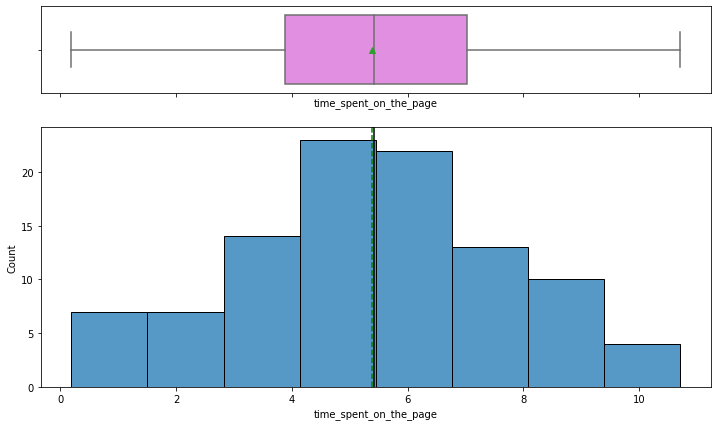

In [14]:
histogram_boxplot (data= df, feature= 'time_spent_on_the_page')

**Observations:** 
 * The data is continuous and normally distributed. The mean, median and mode are almost the same. 
 * The mean time users spent on the page is about five minutes. Five minutes is also the time spent on the page for most of the users (mode), and the value in the middle of the distribution (median). 
 * Although the data is a little bit left-skewed there are no extreme values or outliers.
 

#### Landing Page

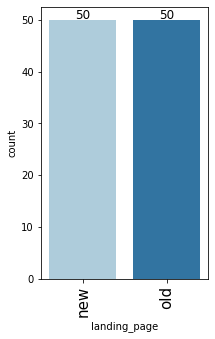

In [15]:
labeled_barplot (data= df, feature= 'landing_page')

**Observation:** The data is equally divided between new and old landing page. 50 users navigated the new landing page, and 50 the old one. 

#### Group

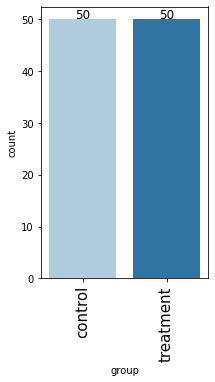

In [16]:
labeled_barplot (data= df, feature= 'group')

**Observation:** The data is equally divided between control and traatment group. 50 users belongs to the first group (control), and 50 to the second group (treatment).

#### Preferred Language

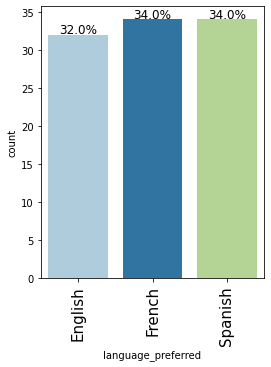

In [17]:
labeled_barplot (data= df, feature= 'language_preferred', perc = True)

**Observation:** 32% of the users preferred English, 34% French, and 34% Spanish. The users are almost equally divided between the three possible languages.

#### Conversion status

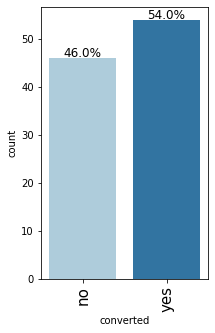

In [18]:
labeled_barplot (data= df, feature= 'converted', perc = True)

**Observation:** Most of the total users got converted (54%). 

### Bivariate Analysis

#### Landing Page vs Time Spent on the Page

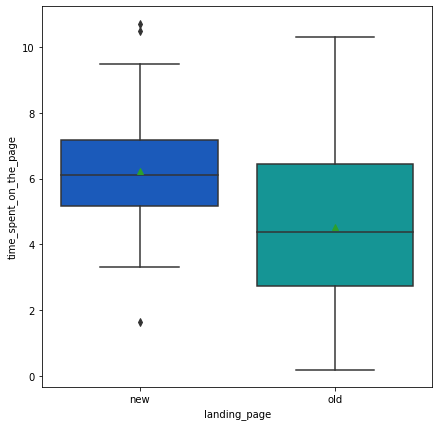

In [19]:
plt.figure(figsize = (7, 7))
sns.boxplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page', showmeans = True, palette = 'winter');

**Observations:** 
* The avarage and mean time users spent on the page is about six minutes for the new page, and four for the old one. 
* Both the mean and the avarage time users spent on the new page is higher than on the old one. 

#### Landing Page vs Time Spent on the Page, segmented by Conversion status

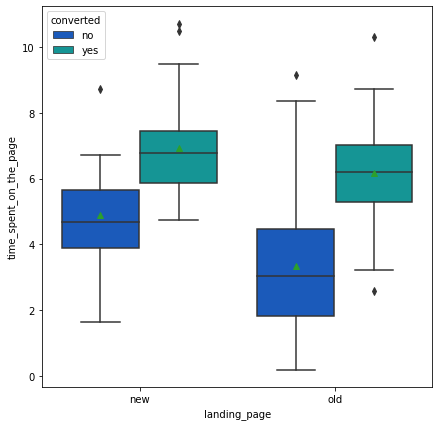

In [20]:
plt.figure(figsize = (7, 7))
sns.boxplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page', 
            hue = 'converted', showmeans = True, palette = 'winter');

**Observations:**
* For users that were converted. Although the avarage time spent in the page is a bit higher for the new one, it is about six and a half minutes for both pages. In the case of the new page there are a couple of outliers on the right side of the distribution, and in the case of the old page there is one outlier on each side.
* If we compare the avarage time user that were not converted spent in both the new and the old, we can see it is notably less than the time spent by converted users. But, in this case the avarage time for the new and the old page is not that similar. For the new page is more than four minutes, and for the old one is less than four minutes. In the case of users that were not converted, there are not outliers.

**Landing Page vs Time Spent on the Page, segmented by Language Preferred**

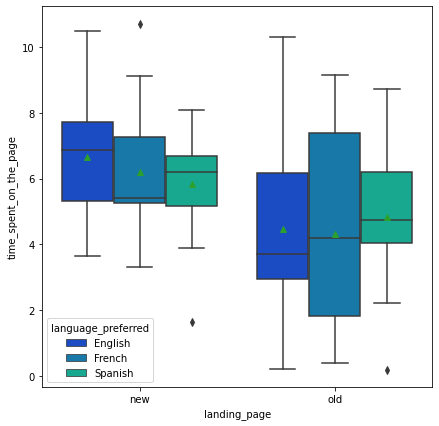

In [21]:
plt.figure(figsize = (7, 7))
sns.boxplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page', 
            hue = 'language_preferred', showmeans = True, palette = 'winter');

**Observations:** 
* The mean time users spent in the new page is similar among the three preferred languages, it is between six and six and a half minutes. However, the median value doesn't seem to be that similar among the three languages.
* In the case of the old page, the mean time users spent in the page is around five minutes for the three posssible languages. 
* There are a cuple of outliers, one French-speking user of the new page, and one Spanish-speaking user of the old page.

**Conversion status vs Time Spent on the Page**

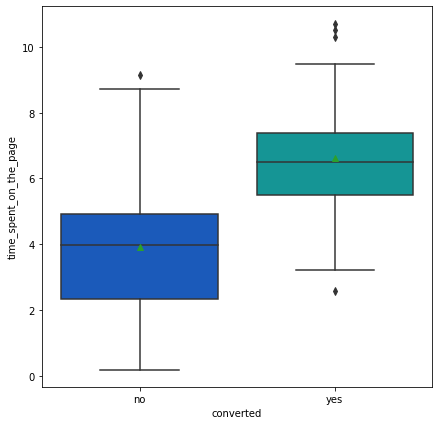

In [22]:
plt.figure(figsize=(7, 7))
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page', showmeans=True, palette='winter');

**Observations:** 
* Users that got converted spent in avarage more time on the page than users that didn't convert. 
* The mean and avarage time converted users spent on the page is about six and a half minutes. 
* The mean and avarage time users that were not converted spent on the page is four minutes.
* There are three outliers on the right side of the distribuition, and one on the left in the case of converted users, and one on the right for not converted.

#### Conversion status vs Preferred Language

In [23]:
#Crosstab language_preferred and converted to prepare data for plotting.
contingency_table = pd.crosstab(index = df.language_preferred, columns = df.converted)  
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


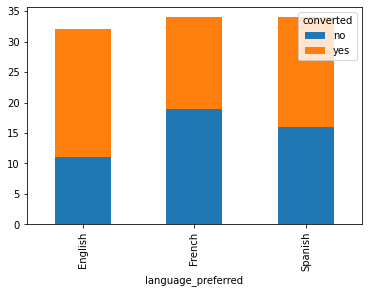

In [24]:
contingency_table.plot (kind='bar', stacked=True);

**Observations:** English is the language perference with a higher number of converted users (21 out of 32). In the second place is Spanish (18 out of 34), and French is the language with less converted users (15 out of 34). 

**Conversion status vs Landing Page**

In [25]:
#Crosstab landing_page and converted to prepare data for plotting.
plot_conv_land= pd.crosstab(index = df.landing_page, columns = df.converted)
plot_conv_land

converted,no,yes
landing_page,,
new,17,33
old,29,21


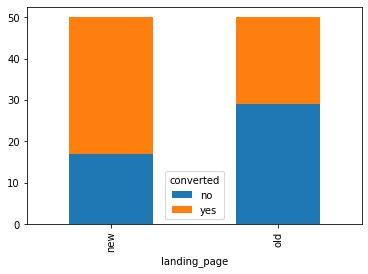

In [26]:
plot_conv_land.plot (kind='bar', stacked=True);

**Observations:** The number of converted users is higher for the new (33 out of 50) than the old page (21 out of 50).

**Time Spent on the Page vs Preferred Language**

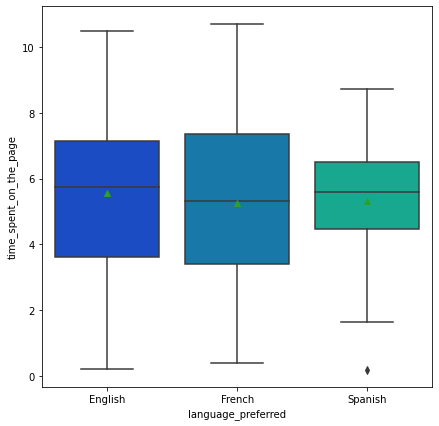

In [27]:
plt.figure(figsize = (7, 7))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, palette = 'winter');

**Observations:** 
* English, French and Spanish speaking users spent an avarage of a bit less than six minutes on the landing page (both the new and the old). The median time for the three languages is also close to the mean. 
* The language preferred by the user that spent less time of the entire dataset is Spanish.
* English and French present a similar dispersion of the data. The variance in the case of Spanish is less compared to for the other two languages.

## 2. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

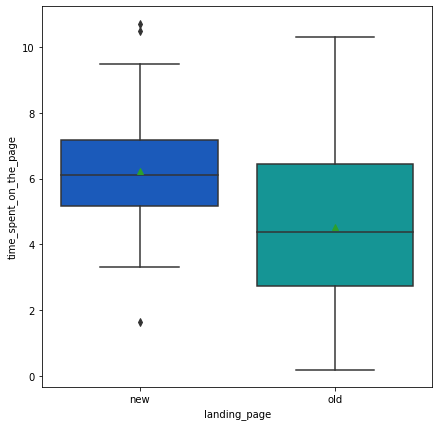

In [28]:
plt.figure(figsize=(7, 7))
sns.boxplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page', showmeans=True, palette='winter');

**Observations:** 
* The avarage time users spent in the page is about six minutes for the new page, and four for the old one. 
* Both the mean and the avarage time users spent on the new page is higher than on the old one. As this is a sample, we cannot conclude this is also true for the population without performing the corresponding test.


### Step 1: Define the null and alternate hypotheses

Considering $\mu_1, \mu_2$ are mean time users spend on new landing page and mean time users spend on existing landing page respectively.

$H_0$: $\mu_1 = \mu_2$, The average time users spend on the new and the existing landing page is equal.

$H_a$: $\mu_1 > \mu_2$, The avarage time users spend on the new landing page is greater than the time users spend in the existing landing page



### Step 2: Select Appropriate test

The appropiate test is a **one-tailed two independent sample t-test.**

* We use this test because we are interested in comparing the mean of two independ populations, with an unknown population standard deviation. It is a one-tailed test because the alternative hypothesis claims one mean value greater than the other.

Assumptions:
* Continuous data. Our data is time, therefore it's continuos.
* Normaly distributed. In the EDA we can observe the data is normally distributed. Also in the previous visual analysis the box plot shows, although there are some skewers in the time distribuition of the new landing page, the mean and the median are almost equal for both landing pages (but theya re different between the old and new).
* Two independent populations. As given in the in the problem statement, samples were taken from two different groups, therefore the two samples are from two independent populations.
* Randomly sampled. As given in the in the problem statement, the samples were randomly selected.
* Equal/Unequal population standard deviation. We'll check this out before conducting the test. From the visual analysis, given the different size of the boxes, it is possible that the standard deviation of both samples is unequal.


### Step 3: Decide the significance level

* Level of significance: $\alpha$ = 0.05 (given in the problem statement)

In [29]:
alpha = 0.05

### Step 4: Collect and prepare data

In [30]:
#Filter data to get the values for time spent in the new page.
time_new = df.loc[df.landing_page == 'new'] ['time_spent_on_the_page'] 
#Filter data to get the values for time spent in the old page.
time_old = df.loc[df.landing_page == 'old'] ['time_spent_on_the_page']

In [31]:
time_new.std() #Check the standard deviation for the new page.

1.8170310387878263

In [32]:
time_old.std() #Check the standard deviation for the old page.

2.581974849306046

**Observation:**
The standard deviation of both samples is unequal. As the sample standard deviations are different, the population standard deviations may be assumed to be different. Therfore we'll perform a two-independent sample t-test *for unequal population standard deviation.*

### Step 5: Calculate the p-value

In [33]:
test_stat1, p_value1= stats.ttest_ind (time_new, time_old, equal_var = False, alternative= 'greater')
p_value1 = round (p_value1, 6)
p_value1

0.000139

### Step 6: Compare the p-value with $\alpha$

In [34]:
if p_value1 > alpha:
    print ('Given the p_value', p_value1, 'is greater than the level of significance', alpha, 'We fail to reject the Null Hypothesis.')
else:
    print ('Given the p_value', p_value1, 'is less than the level of significance', alpha, '. We reject the Null Hypothesis in favor of the Alternative.')

Given the p_value 0.000139 is less than the level of significance 0.05 . We reject the Null Hypothesis in favor of the Alternative.


### Step 7:  Draw inference

* As the p-value (~0.000139) is way less than the level of significance (0.05), we can reject the null hypothesis, therefore the time users spend in the new and the old landing page is not equal. With 95% confidence, we can support the claim that the avarage time users spend in the new lading page is greater than the time users spend in the old one.

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? 

### Visual Analysis

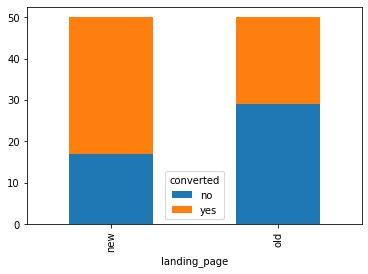

In [35]:
plot_conv_land.plot (kind='bar', stacked=True);

**Observations:** The number of converted users is higher for the new (33 out of 50) than the old page (21 out of 50). As this is a sample, we cannot conclude this is also true for the population without performing the corresponding test.


### Null and alternate hypotheses

Considering $P_1, P_2$ are the proportion of users that get converted after visiting the new and the old landing respectively.


$H_0$: $P_1 = P_2$ , The conversion rate of the new and the existing landing page is equal.

$H_a$: $P_1 > P_2$, The convertion rate of the new landing page is greater than the convertion rate of the old landing page




### Appropriate test

The appropiate test is a **one-tailed two-samples proportion z-test**
* We use this test because we want to compare two proportions from two samples. It is a one-tailed test because the alternative hypothesis claims there is one proportion greater than the other.

Assumptions:
* Randomly sampled. As given in the in the problem statement the samples were randomly selected.
* Binomial distribution. As this is a proportion, the distribution can be shaped as binominal (Converted-Not converted).
* Normaly distributed. For binomial data the CLT works if np and n(1-p) are greater than or equal to 10. Here n and p represent sample size and sample proportion respectively. As we can see both the sample size and the sample proportion are greater than 10 for the two samples:
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

### Significance level

* Level of significance: $\alpha$ = 0.05 (given in the problem statement)

### Data collection and preparation

In [36]:
n1 = df.loc[df.landing_page == 'new'] #Check the sameple size for Proportion 1 (New landing page)
n1 = n1.shape[0]
n1

50

In [37]:
p1 = df.loc[(df.landing_page == 'new') & (df.converted == 'yes')]#Check the count for Proportion 1 (New landing page)
p1 = p1.shape[0]
p1

33

In [38]:
n2 = df.loc[df.landing_page == 'old'] #Check the sameple size for Proportion 2 (Old landing page)
n2 = n2.shape[0]
n2

50

In [39]:
p2 = df.loc[(df.landing_page == 'old') & (df.converted == 'yes')] #Check the count for Proportion 2 (Old landing page)
p2 = p2.shape[0]
p2

21

In [40]:
count = np.array ([p1, p2]) #Create an array with the values from Proportion 1 and Proportion 2 counts.
nobs = np.array ([n1, n2]) #Create an array with the number of observations.

### P-value calculation

In [41]:
from statsmodels.stats.proportion import proportions_ztest #Import the required function to conduct the test.

In [42]:
test_stat2, p_value2 = proportions_ztest (count, nobs, alternative = 'larger')
p_value2 = round (p_value2, 6)
p_value2

0.008026

###  P-value and $\alpha$ comparison

In [43]:
if p_value2 > alpha:
    print ('Given the p_value', p_value2, 'is greater than the level of significance', alpha, 'We fail to reject the Null Hypothesis.')
else:
    print ('Given the p_value', p_value2, 'is less than the level of significance', alpha, '. We reject the Null Hypothesis in favor of the Alternative.')

Given the p_value 0.008026 is less than the level of significance 0.05 . We reject the Null Hypothesis in favor of the Alternative.


### Inference

* As the p-value (~0.008026) is way less than the level of significance (0.05), we can reject the null hypothesis, therefore the conversion rate is not the same for both landing pages. With 95% confidence, we can support the claim that the new page does a better job than the old one in converting users.

## 4. Is the conversion and preferred language are independent or related? 

### Visual Analysis

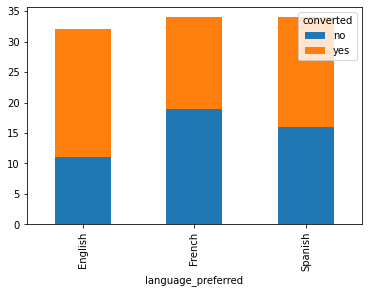

In [44]:
contingency_table.plot (kind='bar', stacked=True); 

**Observations:** English is the language perference with a higher number of converted users (21 out of 32). In the second place is Spanish (18 out of 34), and French is the language with less converted users (15 out of 34). As this is a sample, we cannot conclude this is also true for the population without performing the corresponding test.


### Null and alternate hypotheses

$H_0:$ The Conversion Rate is independent of Preferred Language.


$H_a:$ The Conversion Rate depends on Preferred Language.

### Appropriate test

The appropiate test is a **Chi-square test of independence**

* We use this test because we want to determine whether there is a significant association between two categorical variables (conversion rate and preferred language).


Assumptions:
* Randomly sampled. As given in the in the problem statement the samples were randomly selected.
* Categorical variables. Both variables, Conversion Rate are Preferred Language, are categorical variables.
* The expected value of sample observations in each level of the variable is at least 5. We can easily observe this is true at the plot and the contingency table.

### Significance level

* Level of significance: $\alpha$ = 0.05 (given in the problem statement)

### Data collection and preparation

In [45]:
#This table was created to perfom the EDA. The code is available in the first section.
contingency_table 

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### P-value calculation

In [46]:
chi, p_value3, dof, expected = stats.chi2_contingency (contingency_table)
p_value3 = round (p_value3, 6)
p_value3

0.212989

###  P-value and $\alpha$ comparison

In [47]:
if p_value3 > alpha:
    print ('Given the p_value', p_value3, 'is greater than the level of significance', alpha, 'We fail to reject the Null Hypothesis.')
else:
    print ('Given the p_value', p_value3, 'is less than the level of significance', alpha, '. We reject the Null Hypothesis in favor of the Alternative.')

Given the p_value 0.212989 is greater than the level of significance 0.05 We fail to reject the Null Hypothesis.


### Inference

* As the p-value (~0.2129) is higher than the level of significance (0.05), we don't have enough evidence to reject the null hypothesis, then the conversion rate is independent of the preferred language. With 95% confidence, we can assume that language preference and conversion rate are not related.

## 5. Is the time spent on the new page same for the different language users? 

### Visual Analysis

In [48]:
#Create a dataframe including the three relevant columns for this analysis: landing_page, time_spent_on_the_page, language_preferred.
df_anova = df.loc[:, ['landing_page', 'time_spent_on_the_page', 'language_preferred']] 

In [49]:
#Cast the variable landing_page into 'object' type before filtering it by 'new'. 
#Otherwise the category 'old' remains in the dataset.

df_anova.landing_page = df_anova.landing_page.astype('object') 

In [50]:
df_anova = pd.DataFrame(df_anova.loc [df_anova.landing_page == 'new']) #Filter the values for the 'new' landing page.

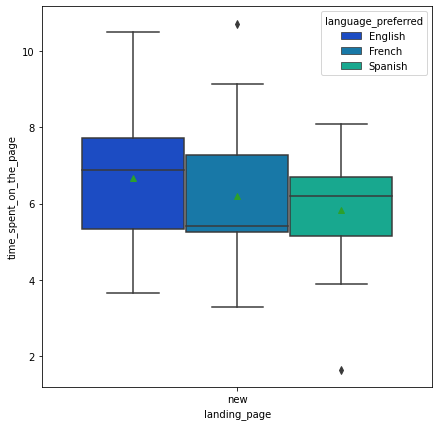

In [51]:
plt.figure(figsize = (7, 7))
sns.boxplot(data = df_anova, x = 'landing_page', y = 'time_spent_on_the_page', hue = 'language_preferred', showmeans = True, palette = 'winter');

**Observations:** French and Spanish speaking users spent an avarage about six minutes on the landing page. English speakers an avarage of seven minutes. The median time is not that similar among the three languages. As this is a sample, we cannot conclude this is also true for the population without performing the corresponding test.



### Null and alternate hypotheses

Considering that $\mu_1, \mu_2, \mu_3$ are the mean time spent in the new page for English, French and Spanish users respectively.

$H_0: \mu_1 = \mu_2 = \mu_3$

$H_a: $ At least one mean time spent in the new landing page is different from the rest.

### Appropriate test

The appropriatet test is an **One-way ANOVA test**
* We use this test because we want to determine whether the means of more than two independent populations are significally different. It is a one-way test because the dependent variable (time spent on the page) depends on a single factor (preferred language) with various levels (English, French, Spanish).

Assumptions:
* The populations are normally distributed - We'll verify this assumption using the Shapiro-Wilk’s test.
* Population variances are equal - We'll verify this assumption using the Levene's test.
* Randomly sampled. As given in the in the problem statement the samples were randomly selected.

### Significance level

* Level of significance: $\alpha$ = 0.05 (given in the problem statement)

### Data collection and preparation

#### Assumption 1: Normality 
#### Shapiro-Wilk’s test

* $H_0:$ The time users spend in the new page follows a normal distribution

* $H_a:$ The time users spend in the new page does not follow a normal distribution

In [52]:
w, p_value_a = stats.shapiro(df_anova.time_spent_on_the_page) 
print('The p-value is', p_value_a)

The p-value is 0.8040016293525696


In [53]:
if p_value_a > alpha:
    print ('Given the p_value', p_value_a, 'is greater than the level of significance', alpha, 'We fail to reject the Null Hypothesis.')
else:
    print ('Given the p_value', p_value_a, 'is less than the level of significance', alpha, '. We reject the Null Hypothesis in favor of the Alternative.')

Given the p_value 0.8040016293525696 is greater than the level of significance 0.05 We fail to reject the Null Hypothesis.


**Observation:** The p_value is greater than the level of significance, therefore we fail to reject the hypothesis, and we can asume the population follows a normal distribution.

#### Assumption 2: Homogeneity of Variance
#### Levene’s test

* $H_0$: All the population variances are equal
* $H_a$: At least one variance is different from the rest

In [54]:
statistic, p_value_b = stats.levene( df_anova['time_spent_on_the_page'][df_anova['language_preferred']=="English"], 
                                   df_anova['time_spent_on_the_page'][df_anova['language_preferred']=="Spanish"], 
                                   df_anova['time_spent_on_the_page'][df_anova['language_preferred']=="French"])
p_value_b = round (p_value_b, 6)
p_value_b

0.467114

In [55]:
if p_value_b > alpha:
    print ('Given the p_value', p_value_b, 'is greater than the level of significance', alpha, 'We fail to reject the Null Hypothesis.')
else:
    print ('Given the p_value', p_value_b, 'is less than the level of significance', alpha, '. We reject the Null Hypothesis in favor of the Alternative.')

Given the p_value 0.467114 is greater than the level of significance 0.05 We fail to reject the Null Hypothesis.


**Observation:** The p_value is greater than the level of significance, therefore we fail to reject the hypothesis, we can asume the population variances homogeneity.

### P-value calculation

#### ANOVA-test

In [56]:
test_stat4, p_value4 = stats.f_oneway(df_anova.loc[df_anova['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df_anova.loc[df_anova['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df_anova.loc[df_anova['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
p_value4 = round (p_value4, 6)
p_value4

0.432041

###  P-value and $\alpha$ comparison

In [57]:
if p_value4 > alpha:
    print ('Given the p_value', p_value4, 'is greater than the level of significance', alpha, 'We fail to reject the Null Hypothesis.')
else:
    print ('Given the p_value', p_value4, 'is less than the level of significance', alpha, '. We reject the Null Hypothesis in favor of the Alternative.')

Given the p_value 0.432041 is greater than the level of significance 0.05 We fail to reject the Null Hypothesis.


### Inference

* As the p-value (~0.43) is much higher than the level of significance (0.05), we don't have enough evidence to reject the null hypothesis. Therefore there is no enough evidence against the claim that the mean time users spend in the new page is the same for English, Spanish, and French speaking users. With 95% confidence, we can assume that the avarage time users spend in the new page is not different for the different language users. 

## Conclusion and Business Recommendations

Based on the analysis of the available data, we can conclude that:
* The new page is more effective to gather new subscribers. There are different aspects in which the new landing page does a better job:
** The new landing page is more engaging for the users. The avarage time users spend on the new landing page is greater than the time users spend in the existing landing page. 
** The new landing page is more "catchy". Users that navigate the new landing page tend to suscribe more. The convertion rate of the new landing page is greater than the convertion rate of the old landing page.
* Regarding to language preference, it doesn't seem to have a significant influence over users' behaviour:
** The conversion rate is independent of the preferred language.
** The mean time users spend in the new page is the same for English, Spanish, and French speaking users. 

Recommendations:
* In order to gather new suscribers in a more effective way, the company needs to replace the old landing page with the new one.
* Based on the current data, language preference doesn't show a sifnificant impact over the time users spend on the page and their suscription. The company may not need to target users with a specific language to gather new suscribers.

Further Analysis:
* If the company is interested in investing more resources on targetting specific language users, more data needs to be collected and analysed. Users from different lingustic and ethnic groups may be interested in consuming different type of news, and information about different topics. Therefore a landing page tailored according to those interest could foster more engagement and greater suscription rates. 
* The visual exploration of the data (Landing Page vs Time Spent on the Page, segmented by Converted) shows that users that got converted spent more time on the page than users that didn't suscribe, for both the new and the old landing page. For both landing pages, the mean time users that got converted spent in the landing page is about six minutes, and between three and a half and four and a half minutes for those that didn't convert.
* If the company is interested in exploring the relationship betwen time spend in the page and conversion. It will be necesary to conduct further analysis to figure out if there is a statistical correlation between this two variables. If time spend on the page and conversion are related, future modifications of the page content should be oriented by this feature. 